In [18]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [23]:
!pip install pmdarima

  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)


In [2]:
#Load the data 
mining=pd.read_excel("datamining.xlsx",header=0)

In [3]:
#Do exploratory data analysis 
mining.shape

(755, 7)

In [4]:
mining.head()

,date,open,high,low,close,adjacent,volume
0,2018-01-02,24809.35,24864.19,24741.70,24824.01,24824.01,"3,411,30"
1,2018-01-03,24850.45,24941.92,24825.55,24922.68,24922.68,4567900
2,2018-01-04,24964.86,25105.96,24963.27,25075.13,25075.13,4032800
3,2018-01-05,25114.92,25299.79,25112.01,25295.87,25295.87,3580200
4,2018-01-08,25308.40,25311.99,25235.41,25283.00,25283.00,3413900


In [5]:
#checking the range in which DateTime variable is available
mining['date'].min(), mining['date'].max()

(Timestamp('2018-01-02 00:00:00'), Timestamp('2020-12-30 00:00:00'))

In [6]:
#Sorting the values from oldest to newest
mining = mining.sort_values('date',ascending=True)
mining.isnull().sum()

date        0
open        0
high        0
low         0
close       0
adjacent    0
volume      0
dtype: int64

In [7]:
#keeping only the required variables by dropping other variables 
mining=mining.drop(["open","high","low","adjacent","volume"],axis=1)

In [8]:
mining.shape
mining.head()

,date,close
0,2018-01-02,24824.01
1,2018-01-03,24922.68
2,2018-01-04,25075.13
3,2018-01-05,25295.87
4,2018-01-08,25283.00


In [9]:
#setting the date variable as index
mining = mining.set_index('date')

In [10]:
mining.head()

,close
date,
2018-01-02,24824.01
2018-01-03,24922.68
2018-01-04,25075.13
2018-01-05,25295.87
2018-01-08,25283.00


In [11]:
#resampling the data in order to remove the missing dates.
#we consider resampling on the monthly basis 
y = mining['close'].resample("MS").mean()


In [12]:
print(y.shape)
y

(36,)


date
2018-01-01    25804.017619
2018-02-01    24981.545263
2018-03-01    24582.170476
2018-04-01    24304.212857
2018-05-01    24572.532273
2018-06-01    24790.108095
2018-07-01    24978.231429
2018-08-01    25629.988261
2018-09-01    26232.667895
2018-10-01    25609.341739
2018-11-01    25258.675238
2018-12-01    23805.545263
2019-01-01    24157.795238
2019-02-01    25605.526842
2019-03-01    25722.620952
2019-04-01    26401.577143
2019-05-01    25744.788636
2019-06-01    26160.101000
2019-07-01    27089.186818
2019-08-01    26057.728182
2019-09-01    26900.214000
2019-10-01    26736.797826
2019-11-01    27797.046000
2019-12-01    28167.005714
2020-01-01    28879.994286
2020-02-01    28519.731579
2020-03-01    22637.420909
2020-04-01    23293.900000
2020-05-01    24271.021500
2020-06-01    26062.270000
2020-07-01    26385.830909
2020-08-01    27821.367143
2020-09-01    27733.396190
2020-10-01    28005.105000
2020-11-01    29124.036500
2020-12-01    30126.775238
Freq: MS, Name: close, 

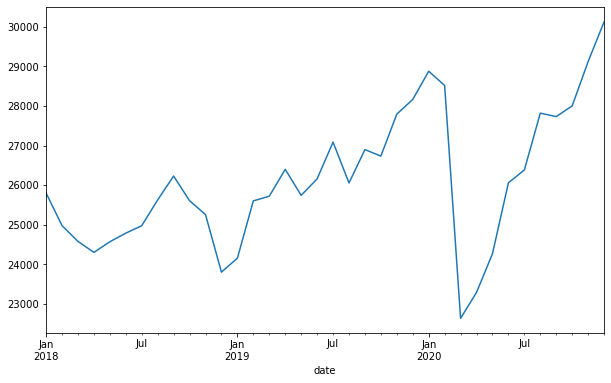

In [13]:
y.plot(figsize=(10, 6))
plt.show()

In [14]:
#divide the data into train and test to perform Holt Winter Model to check for trends and Seasonality
train=y.loc[:'2019-12-01']
train.tail()

date
2019-08-01    26057.728182
2019-09-01    26900.214000
2019-10-01    26736.797826
2019-11-01    27797.046000
2019-12-01    28167.005714
Freq: MS, Name: close, dtype: float64

In [15]:
test=y.loc['2020-01-01':]
test.tail()

date
2020-08-01    27821.367143
2020-09-01    27733.396190
2020-10-01    28005.105000
2020-11-01    29124.036500
2020-12-01    30126.775238
Freq: MS, Name: close, dtype: float64

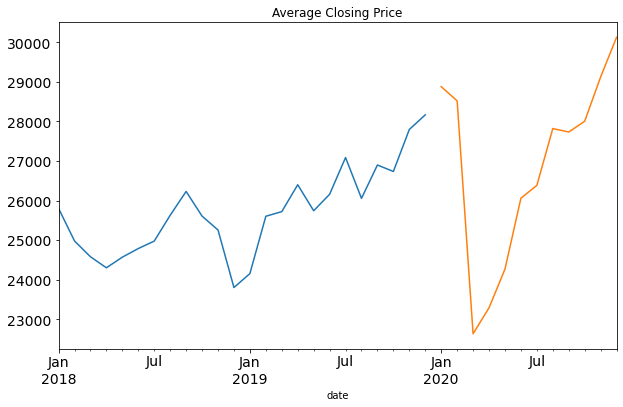

In [16]:
train.plot(figsize=(10,6), title= 'Average Closing Price', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Closing Price', fontsize=14)
plt.show()

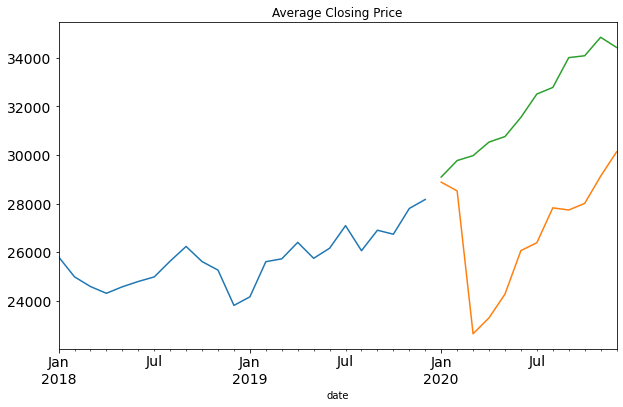

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Closing Price', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Closing Price', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Closing Price', fontsize=14)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

5548.973311048126


In [24]:
#we use the ARIMA model to check for trends and seasonality
import pmdarima as pm

In [25]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=403.634, Time=0.11 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=404.349, Time=0.12 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=404.166, Time=0.05 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=405.077, Time=0.07 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=405.043, Time=0.02 sec
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=406.613, Time=0.08 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=403.570, Time=0.02 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=404.248, Time=0.05 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=405.774, Time=0.10 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=405.414, Time=0.02 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=402.653, Time=0.12 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=403.961, Time=0.23 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=405.489, Time=0.37 sec
 ARIMA(0,2,1)(0,1,0)[12]             

In [26]:
#gives us the values of p,d,f
model

ARIMA(order=(1, 2, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [27]:
# we use the above p,d,f values in our SARIMA model 
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
                order=(1,2,1),seasonal_order=(0,1,0,12)).fit()

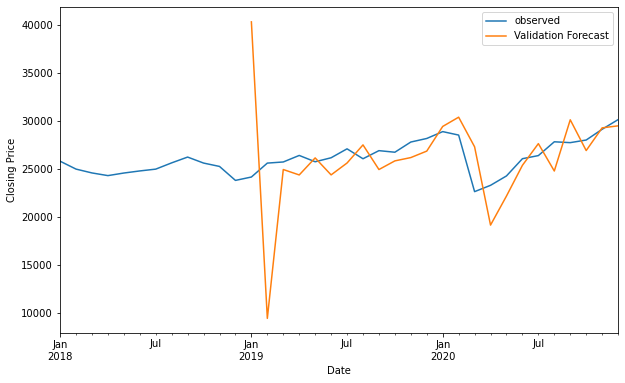

date
2019-01-01    40294.716892
2019-02-01     9455.670965
2019-03-01    24937.672463
2019-04-01    24373.538547
2019-05-01    26145.127067
2019-06-01    24379.381551
2019-07-01    25614.225605
2019-08-01    27499.162722
2019-09-01    24936.348858
2019-10-01    25835.536983
2019-11-01    26180.271910
2019-12-01    26853.873803
2020-01-01    29418.122887
2020-02-01    30380.784908
2020-03-01    27299.569520
2020-04-01    19157.314009
2020-05-01    22179.479650
2020-06-01    25374.581353
2020-07-01    27630.076997
2020-08-01    24782.891192
2020-09-01    30109.540426
2020-10-01    26910.222550
2020-11-01    29269.535198
2020-12-01    29479.849166
Freq: MS, Name: predicted_mean, dtype: float64

In [28]:
#predict for years 2019,2020
pred = model.get_prediction(start=pd.to_datetime('2019-01-01')) 
plt.figure(figsize=(10,6))
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
plt.legend()
plt.show()
pred.predicted_mean

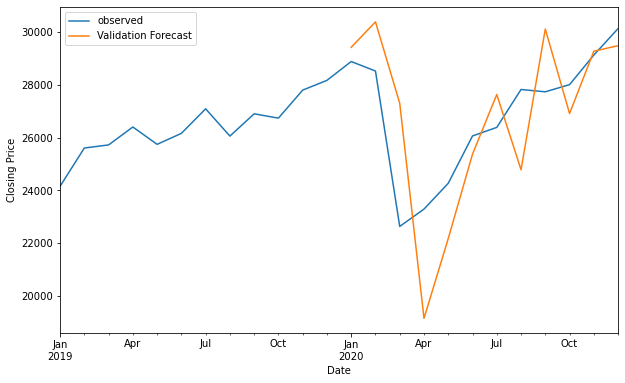

In [29]:
#predict for the year 2020
pred= model.get_prediction(start=pd.to_datetime('2020-01-01')) 
plt.figure(figsize=(10,6))
ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
plt.legend()
plt.show()

In [30]:
pred.predicted_mean

date
2020-01-01    29418.122887
2020-02-01    30380.784908
2020-03-01    27299.569520
2020-04-01    19157.314009
2020-05-01    22179.479650
2020-06-01    25374.581353
2020-07-01    27630.076997
2020-08-01    24782.891192
2020-09-01    30109.540426
2020-10-01    26910.222550
2020-11-01    29269.535198
2020-12-01    29479.849166
Freq: MS, Name: predicted_mean, dtype: float64

In [31]:
#find out the error
Y_pred=pred.predicted_mean
Y_test=y['2020-01-01':]
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

2336.5311692579803


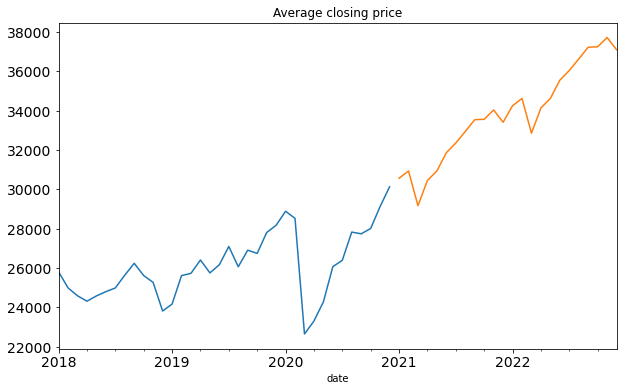

In [32]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Y_predictions = fit1.forecast(steps=24)

y.plot(figsize=(10,6), title= 'Average closing price', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average closing price', fontsize=14)
plt.show()

In [33]:
Y_predictions=Holt_Winter_df["Holt_Winter"]
Y_predictions

2020-01-01    29091.473092
2020-02-01    29769.275860
2020-03-01    29972.228535
2020-04-01    30530.111651
2020-05-01    30756.309361
2020-06-01    31548.643078
2020-07-01    32507.622071
2020-08-01    32778.689408
2020-09-01    34006.726673
2020-10-01    34083.662880
2020-11-01    34844.964865
2020-12-01    34425.825095
Freq: MS, dtype: float64

In [34]:
Y_predictions.to_excel("TIMESERIESOUTPUT.xlsx",index=True)

In [35]:
#above analysis describes that ARIMA model is best suitable to predict the  forecast
rms=3925.300975050569
rms=2336.5328327191805